# # Job Posting Clustering Analysis


In [9]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jovyan/feature_reasoning/doeun/AI_job/Labor-market-trends/embedding_analysis')
import matplotlib.font_manager as fm
from job_posting_map import load_embedding_data
from clustering_analysis import (
    filter_platform,
    filter_ai_jobs,
    add_time_periods,
    perform_pca,
    calculate_centroids,
    extract_representative_docs,
    plot_centroid_movement,
    print_statistics
)

font_path = '/home/jovyan/feature_reasoning/doeun/NanumGothic.ttf'
fm.FontProperties(fname=font_path)
plt.rc('font', family='NanumGothic')

In [2]:
metadata, embeddings = load_embedding_data("job_embeddings_ko_sbert_preprocessed.pkl")
print(f"Îç∞Ïù¥ÌÑ∞: {len(metadata):,}Í∞ú")

Îç∞Ïù¥ÌÑ∞: 371,591Í∞ú


## ÏÑºÌä∏Î°úÏù¥Îìú Î∂ÑÏÑù (ÌîåÎû´ÌèºÎ≥Ñ)
Wanted (2ÎÖÑ Îã®ÏúÑ)

In [3]:
md_wanted, emb_wanted = filter_platform(metadata, embeddings, "wanted")
md_wanted = add_time_periods(md_wanted, date_col="expiration_date", period_months=24)

# AI Í¥ÄÎ†® ÏßÅÎ¨¥ ÌïÑÌÑ∞ÎßÅ
try:
    md_wanted_ai, emb_wanted_ai = filter_ai_jobs(md_wanted, emb_wanted)
    if len(md_wanted_ai) > 10:
        coords_wanted_ai = scaler_wanted.transform(emb_wanted_ai)
        coords_wanted_ai = pca_wanted.transform(coords_wanted_ai)
        centroids_wanted_ai = calculate_centroids(
            md_wanted_ai[md_wanted_ai.index.isin(md_wanted.index)].copy(),
            coords_wanted_ai, min_samples=5
        )
        has_ai_wanted = True
    else:
        has_ai_wanted = False
except:
    has_ai_wanted = False

[wanted] ÌïÑÌÑ∞ÎßÅ: 110,588Í∞ú
ÎÇ†Ïßú Î≤îÏúÑ: 2014-10-13 ~ 2031-09-30
Í∏∞Í∞Ñ Îã®ÏúÑ: 24Í∞úÏõî
Ï¥ù Í∏∞Í∞Ñ Ïàò: 8


In [4]:
# PCA
coords_wanted, pca_wanted, scaler_wanted = perform_pca(emb_wanted, n_components=2)

# ÏÑºÌä∏Î°úÏù¥Îìú
centroids_wanted = calculate_centroids(md_wanted, coords_wanted, min_samples=10)
rep_docs_wanted = extract_representative_docs(md_wanted, coords_wanted, 
                                              centroids_wanted, n_docs=5)
print(f"Wanted Í∏∞Í∞Ñ Ïàò: {len(centroids_wanted)}")

PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞: [0.07752285 0.05957931]
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: 13.71%
Wanted Í∏∞Í∞Ñ Ïàò: 5


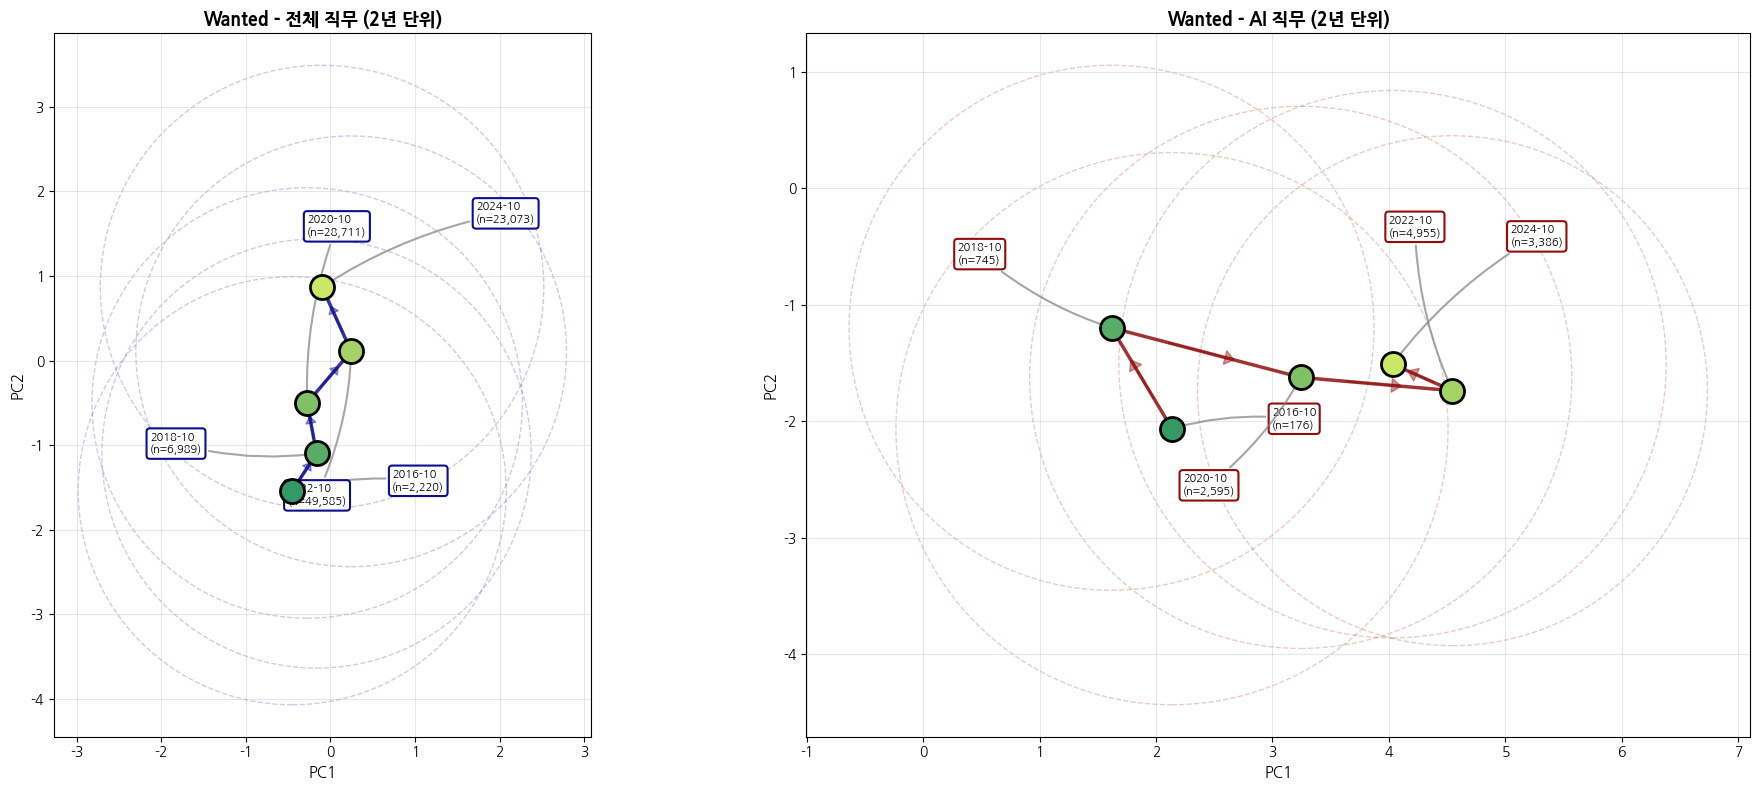

In [10]:
n_plots = 2 if has_ai_wanted else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_wanted, 
                      "Wanted - Ï†ÑÏ≤¥ ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_wanted:
    plot_centroid_movement(axes[1], centroids_wanted_ai,
                          "Wanted - AI ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
# plt.savefig("centroid_wanted.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
print_statistics(centroids_wanted, "WANTED - Ï†ÑÏ≤¥ ÏßÅÎ¨¥", rep_docs_wanted)
if has_ai_wanted:
    rep_docs_wanted_ai = extract_representative_docs(
        md_wanted_ai[md_wanted_ai.index.isin(md_wanted.index)].copy(),
        coords_wanted_ai, centroids_wanted_ai, n_docs=5
    )
    print_statistics(centroids_wanted_ai, "WANTED - AI ÏßÅÎ¨¥", rep_docs_wanted_ai)


üìä WANTED - Ï†ÑÏ≤¥ ÏßÅÎ¨¥

Í∏∞Í∞ÑÎ≥Ñ ÏÑºÌä∏Î°úÏù¥Îìú Î∞è ÎåÄÌëú Î¨∏ÏÑú:
----------------------------------------------------------------------

üìÖ 2016-10: (-0.45, -1.54) [N=2,220]
   ÎåÄÌëú Î¨∏ÏÑú:
   1. [wanted] ‚Ä¢ ÏôÄÎîîÏ¶àÏóêÏÑú Ïò§ÌîàÏùÑ ÏõêÌïòÎäî Î¶¨ÏõåÎìú ÌîÑÎ°úÏ†ùÌä∏Î•º Ïã¨ÏÇ¨ÌïòÎäî Ïó≠Ìï†
      Í±∞Î¶¨: 0.292
   2. [wanted] ‚Ä¢ Í∏àÏúµÏÉÅÌíà ÌîåÎû´Ìèº ÏÑúÎπÑÏä§Í∏∞Ìöç
      Í±∞Î¶¨: 0.316
   3. [wanted] ‚Ä¢ ÏöîÍ∏∞Ïöî/Î∞∞Îã¨ÌÜµ ÏÇ¨Ïû•ÎãòÌñ• ÌîåÎû´Ìèº Í∏∞Ìöç(PC/APP)   ‚Ä¢ ÏÇ¨Ïû•Îãò ÌöåÏõê/Î†àÏä§ÌÜ†Îûë Ïö¥ÏòÅ/Î©îÎâ¥ Í¥ÄÎ†® ÏãúÏä§ÌÖú Í∏∞Ìöç
      Í±∞Î¶¨: 0.391
   4. [wanted] ‚Ä¢ Ïã¨Î¶¨ÏÉÅÎã¥ Î∞è Ïã¨Î¶¨ÏºÄÏñ¥ ÏΩòÌÖêÏ∏†Ïö©(Ï±ÑÌåÖÏÉÅÎã¥, Ïã¨Î¶¨Í≤ÄÏÇ¨ Îì±) Ïõπ Î∞è React Native ÌïòÏù¥Î∏åÎ¶¨Îìú Ïï±(Web, App)  ‚Ä¢ Ï†ÑÎ¨∏ ÏÉÅÎã¥ÏÇ¨Í∞Ä ÏÉÅÎã¥ÏùÑ ÏßÑÌñâ(Ï±ÑÌåÖ Îì±)ÌïòÎäî ÏÉÅÎã¥ÏÇ¨ ÌîåÎû´
      Í±∞Î¶¨: 0.440
   5. [wanted] [1] ÏÑúÎπÑÏä§Í∏∞Ìöç ÌååÌä∏  Ï£ºÏöî ÏóÖÎ¨¥   - ÏÑúÎπÑÏä§ ÏöîÍµ¨ÏÇ¨Ìï≠ ÏàòÏßë, Î∞úÍµ¥, Ï†ïÎ¶¨     > Îã§ÏñëÌïú ÏÑúÎπÑÏä§Îì§ÏùÑ Î∂ÑÏÑùÌïòÏó¨ Insight ÎèÑÏ∂ú     > Íµ≠ÎÇ¥Ïô∏  

## work24

In [13]:
md_work24, emb_work24 = filter_platform(metadata, embeddings, "work24")
md_work24 = add_time_periods(md_work24, date_col="expiration_date", period_months=2)

try:
    md_work24_ai, emb_work24_ai = filter_ai_jobs(md_work24, emb_work24)
    if len(md_work24_ai) > 10:
        coords_work24_ai = scaler_wanted.transform(emb_work24_ai)
        coords_work24_ai = pca_wanted.transform(coords_work24_ai)
        centroids_work24_ai = calculate_centroids(
            md_work24_ai[md_work24_ai.index.isin(md_work24.index)].copy(),
            coords_work24_ai, min_samples=5
        )
        has_ai_work24 = True
    else:
        has_ai_work24 = False
except:
    has_ai_work24 = False


[work24] ÌïÑÌÑ∞ÎßÅ: 200,582Í∞ú
ÎÇ†Ïßú Î≤îÏúÑ: 2025-08-05 ~ 2025-12-15
Í∏∞Í∞Ñ Îã®ÏúÑ: 2Í∞úÏõî
Ï¥ù Í∏∞Í∞Ñ Ïàò: 3
AI ÏßÅÎ¨¥ ÌïÑÌÑ∞ÎßÅ: 508Í∞ú (0.3%)


In [14]:
coords_work24, pca_work24, scaler_work24 = perform_pca(emb_work24)
centroids_work24 = calculate_centroids(md_work24, coords_work24, min_samples=10)
print(f"Work24 Í∏∞Í∞Ñ Ïàò: {len(centroids_work24)}")
rep_docs_work24 = extract_representative_docs(md_work24, coords_work24,
                                              centroids_work24, n_docs=5)

PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞: [0.10686867 0.04816022]
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: 15.50%
Work24 Í∏∞Í∞Ñ Ïàò: 3


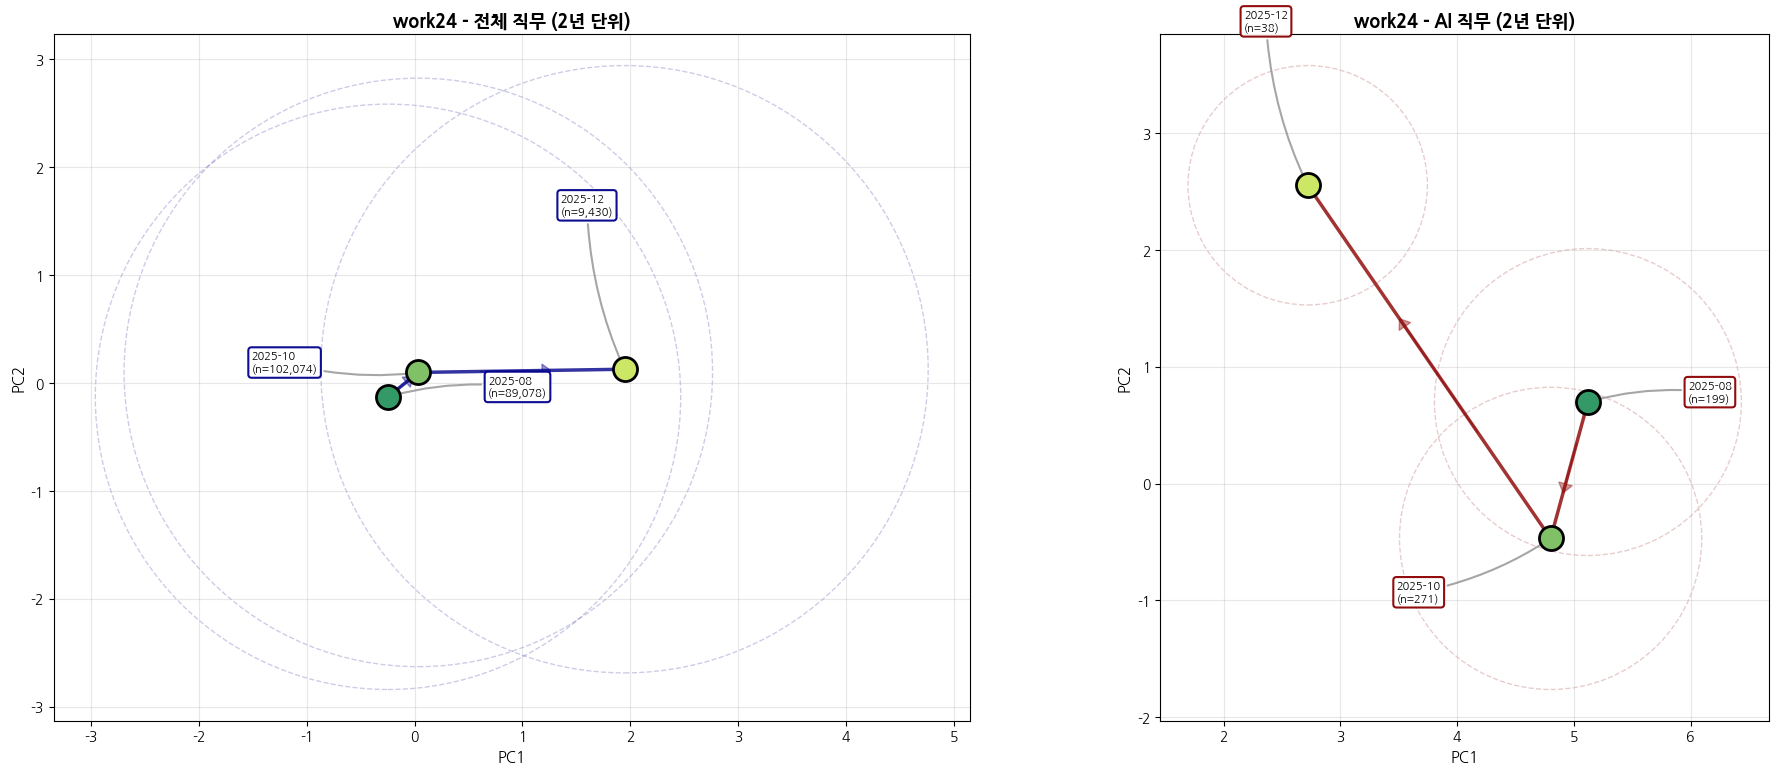

In [19]:
n_plots = 2 if has_ai_work24 else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_work24, 
                      "work24 - Ï†ÑÏ≤¥ ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_work24:
    plot_centroid_movement(axes[1], centroids_work24_ai,
                          "work24 - AI ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
# plt.savefig("centroid_wanted.png", dpi=300, bbox_inches="tight")
plt.show()

## Saramin

In [21]:
md_saramin, emb_saramin = filter_platform(metadata, embeddings, "saramin")
md_saramin = add_time_periods(md_saramin, date_col="expiration_date", period_months=2)

try:
    md_saramin_ai, emb_saramin_ai = filter_ai_jobs(md_saramin, emb_saramin)
    if len(md_saramin_ai) > 10:
        coords_saramin_ai = scaler_wanted.transform(emb_saramin_ai)
        coords_saramin_ai = pca_wanted.transform(coords_saramin_ai)
        centroids_saramin_ai = calculate_centroids(
            md_saramin_ai[md_saramin_ai.index.isin(md_saramin.index)].copy(),
            coords_saramin_ai, min_samples=5
        )
        has_ai_saramin = True
    else:
        has_ai_saramin = False
except:
    has_ai_saramin = False


[saramin] ÌïÑÌÑ∞ÎßÅ: 60,421Í∞ú
ÎÇ†Ïßú Î≤îÏúÑ: 2025-08-30 ~ 2033-12-31
Í∏∞Í∞Ñ Îã®ÏúÑ: 2Í∞úÏõî
Ï¥ù Í∏∞Í∞Ñ Ïàò: 6
AI ÏßÅÎ¨¥ ÌïÑÌÑ∞ÎßÅ: 835Í∞ú (1.4%)


In [22]:
# PCA
coords_saramin, pca_saramin, scaler_saramin = perform_pca(emb_saramin)

# ÏÑºÌä∏Î°úÏù¥Îìú
centroids_saramin = calculate_centroids(md_saramin, coords_saramin, min_samples=10)
print(f"Saramin Í∏∞Í∞Ñ Ïàò: {len(centroids_saramin)}")

# ÎåÄÌëú Î¨∏ÏÑú Ï∂îÏ∂ú
rep_docs_saramin = extract_representative_docs(md_saramin, coords_saramin,
                                               centroids_saramin, n_docs=5)

PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞: [0.05687161 0.04197254]
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: 9.88%
Saramin Í∏∞Í∞Ñ Ïàò: 5


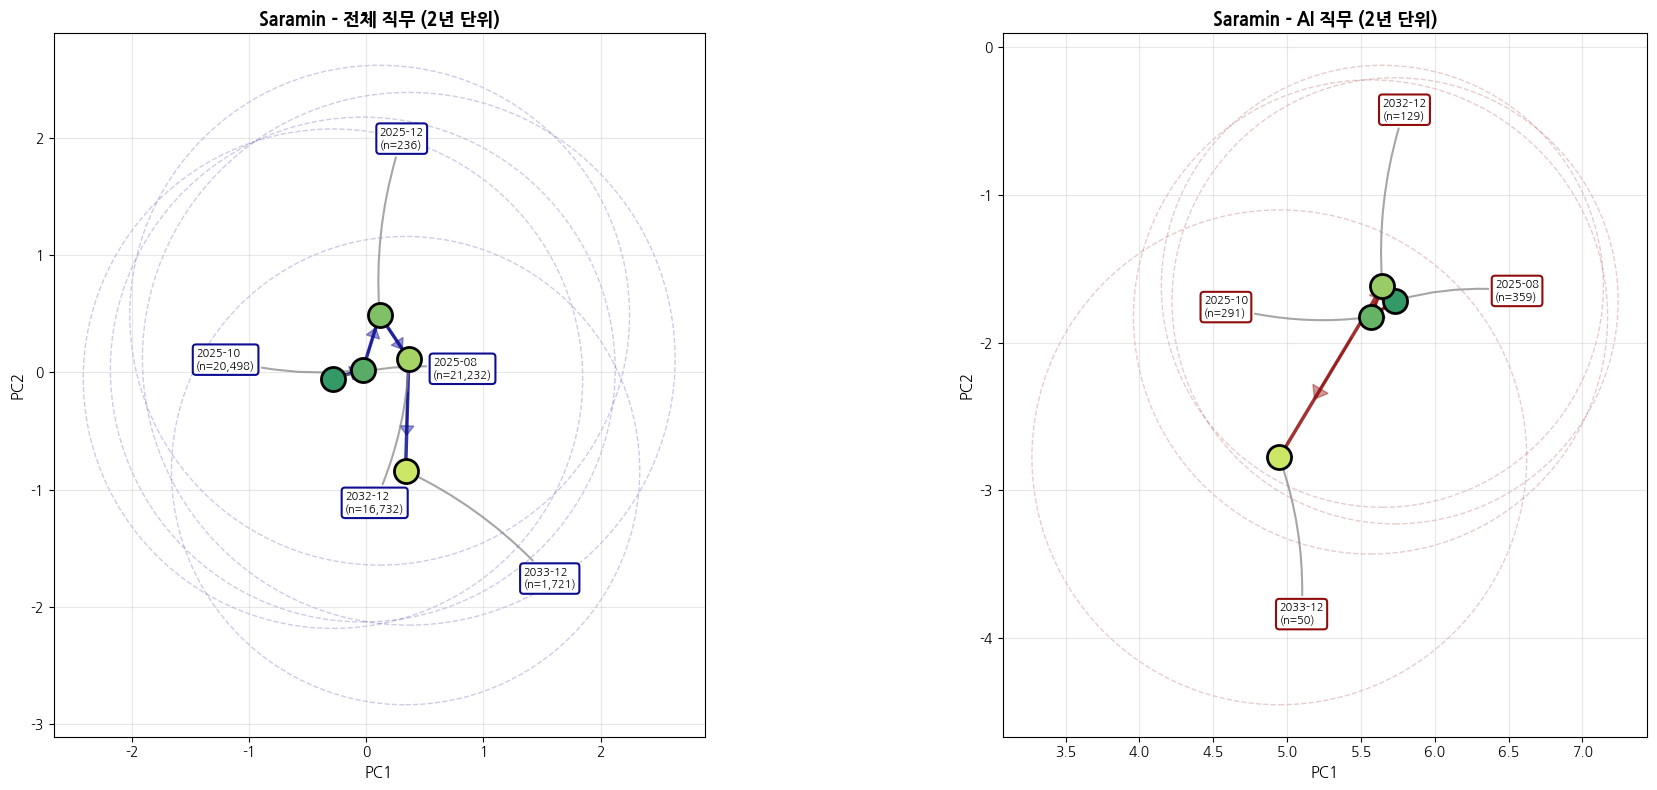

In [23]:
n_plots = 2 if has_ai_saramin else 1
fig, axes = plt.subplots(1, n_plots, figsize=(10*n_plots, 8))
if n_plots == 1:
    axes = [axes]

plot_centroid_movement(axes[0], centroids_saramin, 
                      "Saramin - Ï†ÑÏ≤¥ ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)", 
                      color_main="darkblue", label_offset_scale=1.2)

if has_ai_work24:
    plot_centroid_movement(axes[1], centroids_saramin_ai,
                          "Saramin - AI ÏßÅÎ¨¥ (2ÎÖÑ Îã®ÏúÑ)",
                          color_main="darkred", label_offset_scale=1.2)

plt.tight_layout()
plt.show()

In [ ]:
# end of documents